# Exploring Linear Regression with Gradient Descent and Regularization

In this task, your will explore linear regression with gradient descent and regularization.
Previously we performed linear regression but we actually were using the built-in "normal" equations which automagically were solving for coefficients.  In this lab we will use scikit-learns SGDRegressor, which stands for Stochastic Gradient Descent Regression -- using Gradient descent to perform linear regression! We will try different versions of linear regression that incorporate the regularization term.

Our goals are two fold

1. Practice setting the learning rate on SGD
2. Practice setting the regularization term with linear regression.


In [2]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Create Synthetic Data.
We will use our handy functions again to create data.

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after you are done experimenting, set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

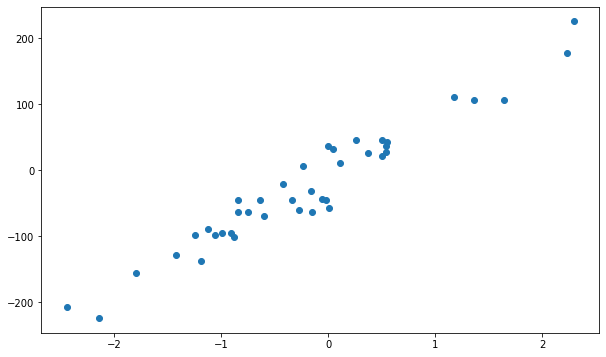

In [4]:
X, y = make_regression(n_samples=40, n_features=1, noise = 20.0, random_state = 2)
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [5]:
#create testing data to plot our prediction onto later - 
# this code is how we "plot a line !!" we need data to create the line
X_test = np.linspace(min(X),max(X),100)

# Linear Regression with Gradient Descent
Ok, now we'll let the computer "learn" for itself what the best line is, but this time using gradient descent.
We'll use the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) model from scikit-learn to do this.  `SGDRegressor` implements Stochastic Gradient Descent and we will set it up to use a least squares (mean squared error) loss function. 

Let's create a linear regression model and fit it to our dataset.

In [ ]:
from sklearn.linear_model import SGDRegressor
LinearRegression()
def plot_linear():
    model = LinearRegression()
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_test = model.predict(X_test.reshape(-1,1))

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten(), y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

In [ ]:
plot_linear()

##  How did your best eye guess compare to linear regression?

# Polynomial Regression

Now let's give our regression model more degrees of freedom.  Can we fit the data better?

How can you tell if the fit is better?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X,y)
    y_test = model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten().reshape(-1,1), y_test, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim((min(y)-10,max(y)+10))


### Try adjusting the degree of the polynomial regression.

What happens? 

In [ ]:
plot_poly(degree = 15)

In [ ]:
plot_poly(degree = 3)

In [ ]:
plot_poly(degree = 4)

In [ ]:
plot_poly(degree = 5)

In [ ]:
plot_poly(degree = 21)

## Imagine that your boss gave you these data-points as part of a housing dataset.

The task would be to find the function that best predicts new homes, that have never been sold before.

You can imagine that the x-axis is the size of the home, and the y-axis is the price of the home.  Just like I did in the class video.

Assuming this simple toy-world:
What degree of freedom would you choose for your final function?  Why?